# Hierarchical Clustering for Customer Data

### In this case study, we are utilizing the hierarchical clustering algorithm to segment customer data. The key components of our analysis include:

### Reading Data:
          We begin by importing and loading the customer data from a suitable data source.

#### Data Exploration:
        We conduct an exploratory data analysis (EDA) to gain insights into the dataset. This involves summarizing statistics,identifying missing values, and understanding the data's structure.

### Visualization: 
      To enhance our understanding, we employ data visualization techniques. This allows us to visually represent patterns,relationships, and trends in the data.

### Label Encoding: 
      If needed, we perform label encoding to convert categorical variables into numerical format, ensuring compatibility with clustering algorithms.

### Dendrogram: 
         We create a dendrogram, which is a tree-like diagram, to visualize the hierarchical structure of the data's clusters.This tool assists in identifying an appropriate number of clusters for our analysis.

### Agglomerative Clustering:
        Utilizing the agglomerative clustering algorithm, we perform the actual clustering of customer data. This algorithm merges similar clusters iteratively, forming a hierarchical structure.

### Cluster Analysis:
        Finally, we interpret and analyze the resulting clusters. We label and characterize each cluster based on the features and behaviors of the customers within them, facilitating meaningful insights and decision-making.



# About data

This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

source= Kaggle

### Clustering

Clustering is the process of categorizing a population or data points into distinct groups, with the goal of ensuring that data points within the same group share more similarities with each other compared to those in different groups. In simpler terms, clustering aims to create clusters of data points with similar characteristics.

###  Hierarchical Clustering

Hierarchical clustering, also referred to as hierarchical cluster analysis, is an algorithm designed to organize similar objects into clusters. The outcome of hierarchical clustering is a collection of clusters, where each cluster is unique from the others, and the objects within each cluster exhibit considerable similarity to one another. This method aids in structuring data into meaningful groups based on their inherent similarities.

In [67]:
# importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [68]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
# shape of dataset
df.shape

(200, 5)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [71]:
# column names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [72]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [73]:
# checking if there is any null values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

no null values in the dataset

# Understanding the dataset

In [74]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Number of female customers are more

## Label Encoding

In [76]:
label_encoder=preprocessing.LabelEncoder()

In [77]:
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [79]:
df.corr()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

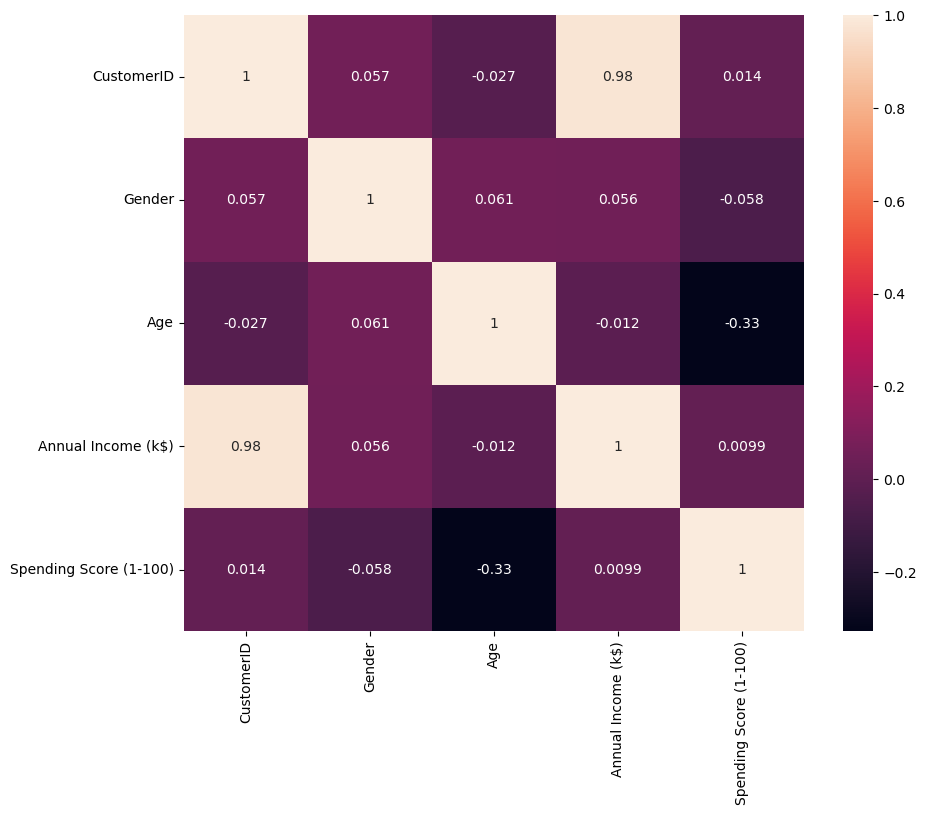

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot =True)

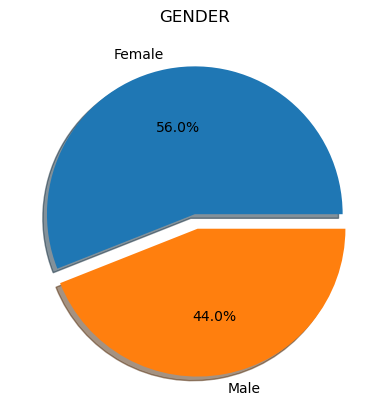

In [82]:
plt.pie(df.Gender.value_counts(),[0,0.1],labels = ['Female','Male'],autopct ='%1.1f%%',shadow = True)
plt.title('GENDER')
plt.show()

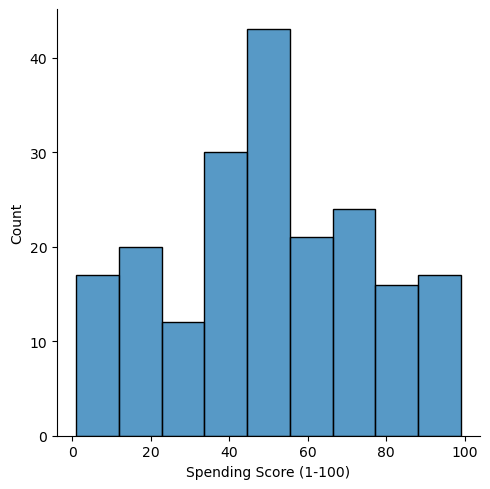

In [83]:
sns.displot(df['Spending Score (1-100)'])


#### The majority of the spending scores fall within the range of 40 to 60

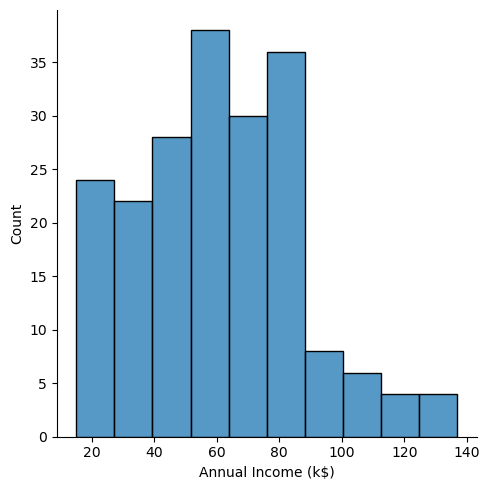

In [85]:
sns.displot(df['Annual Income (k$)'])


#### The annual income of most customers falls within the range of 50 to 70:



<Axes: xlabel='Gender', ylabel='count'>

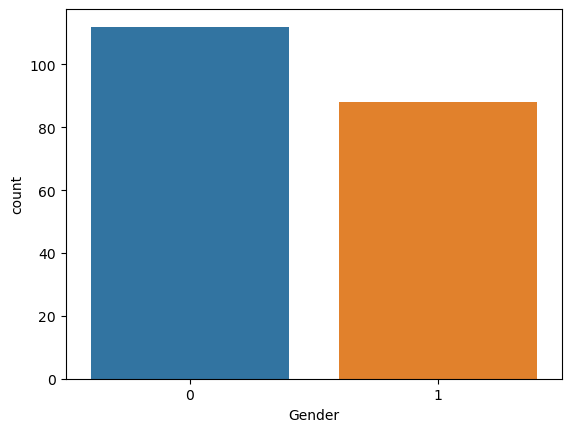

In [87]:
sns.barplot(x =df['Gender'].value_counts().index,y =df['Gender'].value_counts() )


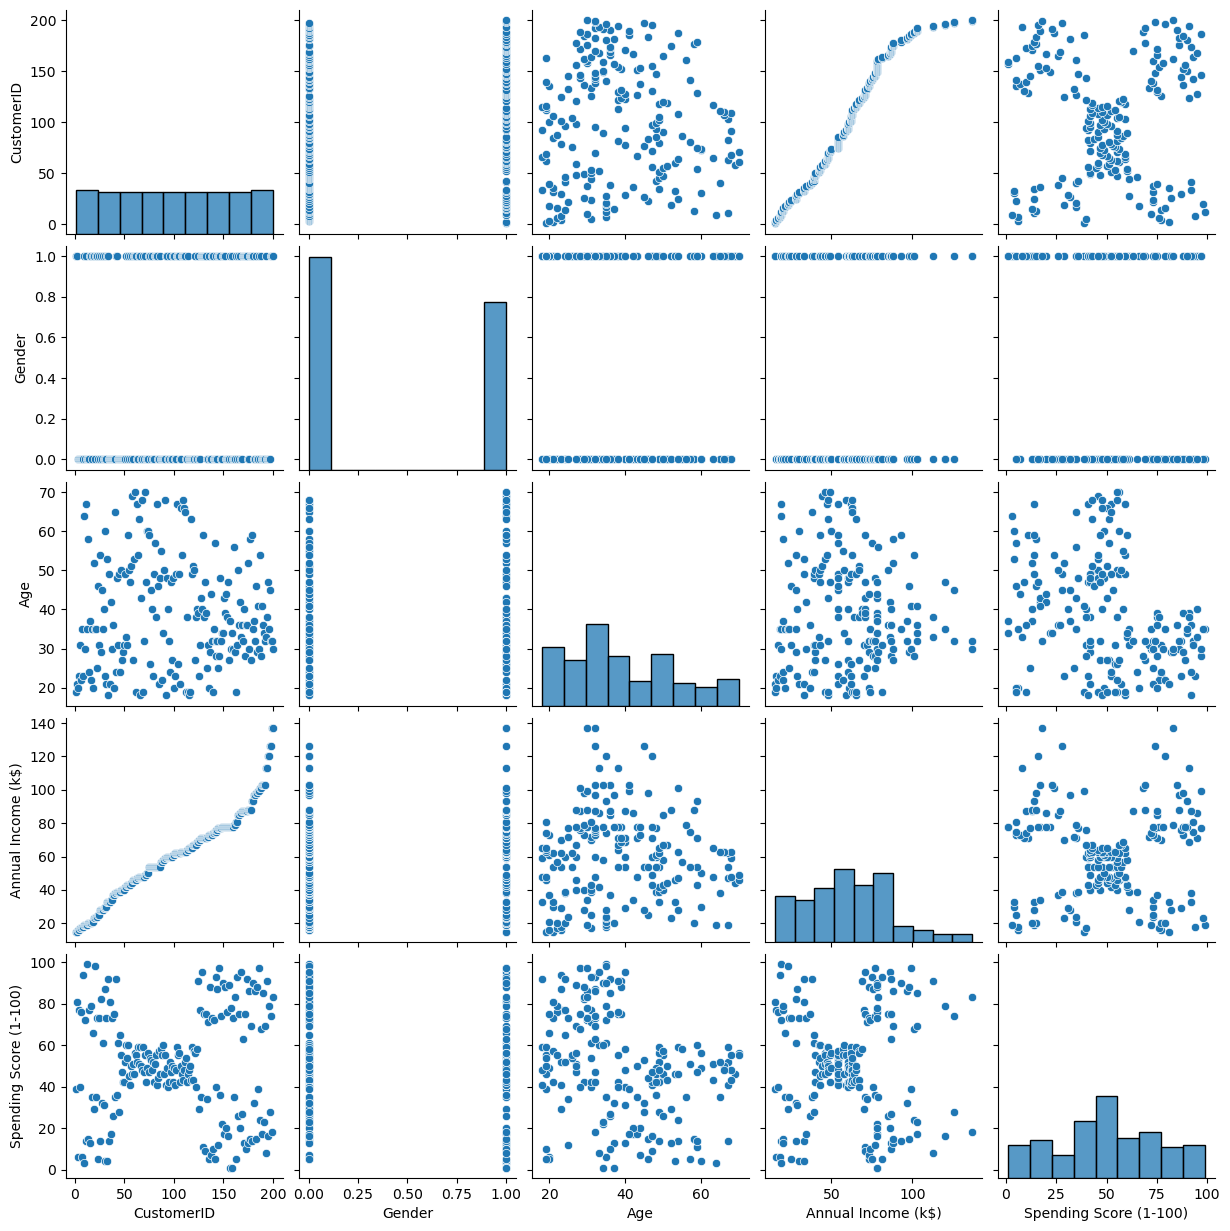

In [89]:
sns.pairplot(df)


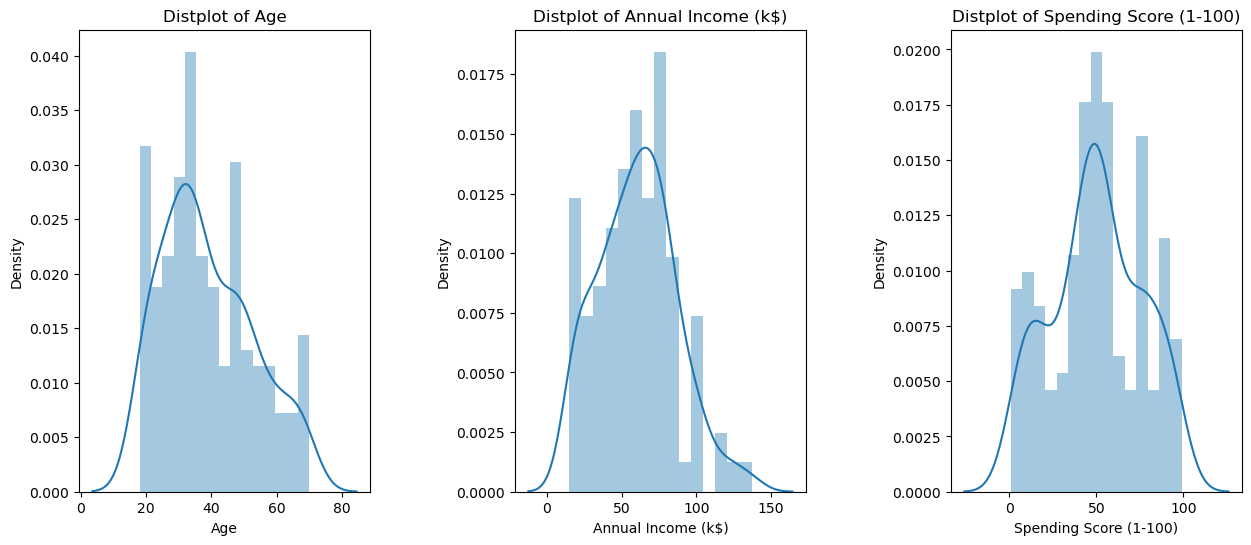

In [22]:
# ditsribution of each colunmn
plt.figure(1 , figsize = (15 , 6))
n=0
for i in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i],bins=15)
    plt.title('Distplot of {}'.format(i))

<Axes: >

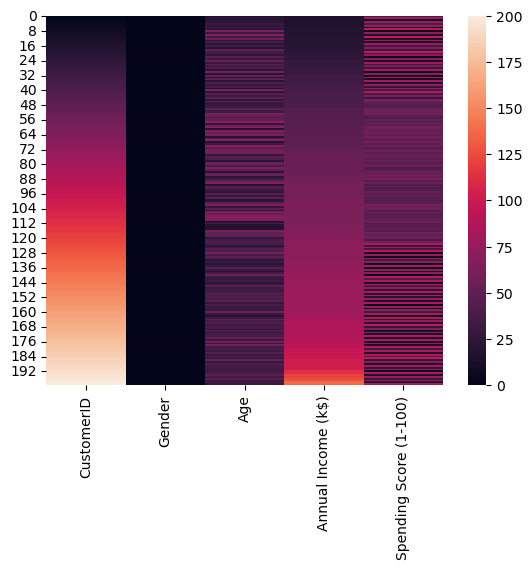

In [30]:
sns.heatmap(df)

# Dendrogram

A dendrogram is like a family tree diagram, but it's used in things like grouping similar items together.

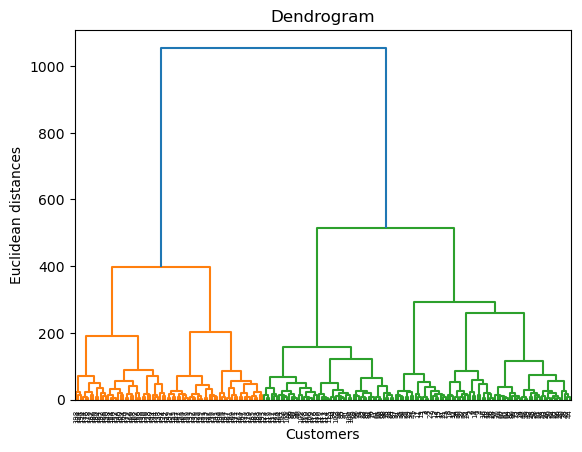

In [32]:
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

sch.linkage(df, method="ward"): This part of the code computes the linkage matrix for hierarchical clustering. It takes your data stored in the DataFrame df and uses the "ward" method for linkage, which is one of the methods for measuring the distance between clusters. You can choose a different linkage method if needed.

sch.dendrogram(): This function takes the linkage matrix as input and creates the dendrogram visualization based on the hierarchical clustering results. The result is stored in the dendrogram variable.

# Agglomerative Clustering

Agglomerative Clustering employs a "bottom-up" methodology, wherein individual observations initially form their separate clusters, and as the process progresses, pairs of clusters are amalgamated to build the hierarchy.

In [36]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

AgglomerativeClustering: This is a clustering algorithm available in Python, typically found in libraries like Scikit-Learn. It performs hierarchical clustering by iteratively merging clusters based on certain criteria.

n_clusters=5: This parameter specifies the number of clusters you want the algorithm to form. In this case, it's set to 5, meaning that the algorithm will try to group your data into 5 distinct clusters.

affinity='euclidean': The 'affinity' parameter determines the distance metric used to calculate the linkage between data points. In this case, 'euclidean' distance is being used, which is the standard Euclidean distance metric. It measures the straight-line distance between two data points in a multi-dimensional space.

linkage='average': The 'linkage' parameter determines the linkage criterion for merging clusters. 'average' linkage means that the algorithm will merge clusters based on the average distance between data points in different clusters.

In [37]:
y_hc=hc.fit_predict(df)

In [38]:
y_hc

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [39]:
df['clusters']=pd.DataFrame(y_hc)

In [40]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,0
197,198,1,32,126,74,1
198,199,1,32,137,18,0


##  Create a 3D scatter plot using plotly

In [56]:
dplot=go.Scatter3d(x=df['Age'],
                   y=df['Annual Income (k$)'],
                   z=df['Spending Score (1-100)'],
                  mode='markers',
                  marker=dict(
    
                   size=10,          # Customize marker size
                   color=df['clusters'],      # Customize marker color
                   opacity=0.8       # Customize marker opacity
                                 ))
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Age'),  # Customize X-axis title
        yaxis=dict(title='Annual Income (k$)'),  # Customize Y-axis title
        zaxis=dict(title='Spending Score (1-100)')   # Customize Z-axis title
    )
)

fig = go.Figure(data=[dplot],layout=layout)



py.offline.iplot(fig)

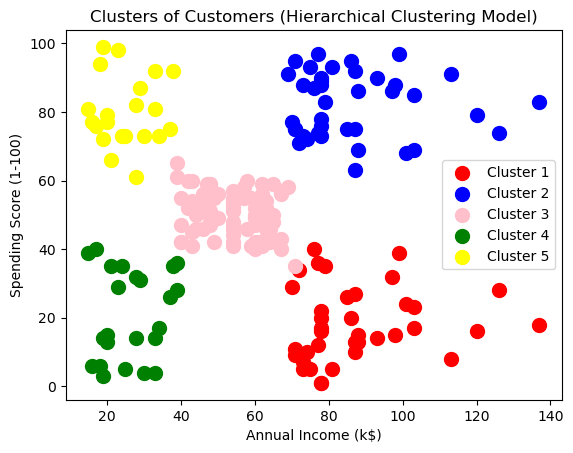

In [65]:
X=df.iloc[:,[3,4]].values
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s=100, c='pink', label='Cluster 3')
plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], s=100, c='green', label='Cluster 4')
plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1], s=100, c='yellow', label='Cluster 5')


plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Cluster Analysis

Cluster 1 (Green): Customers with low income and low spending.

Cluster 2 (Yellow): Customers with low income and high spending.

Cluster 3 (Red): Customers with medium income and medium spending.

Cluster 4 (Purple): Customers with high income and low spending.

Cluster 5 (Blue): Customers with high income and high spending.

This description provides a clearer understanding of the characteristics of each cluster based on income and spending behavior.